## Print the results for using all training data

In [1]:
split_type = 'random'

float_numbers = [
    '4903052',
    '4903054',
    '4903058',
    '4903215',
    '4903217',
    '4903218',
    '4903220'
]

float_number = float_numbers[4]

RESULT_DIR = f'../results/{split_type}split/{float_number}'

In [2]:
import os
import pandas as pd
output_file = os.path.join(RESULT_DIR, 'random_sampling.csv')

# Read the results from the output file
results_df = pd.read_csv(output_file)

# Filter the results for sampling ratio 0.99
filtered_results = results_df[results_df['Sampling Ratio'] == 0.99]

# Select the desired columns
selected_columns = ['Model', 'Precision', 'Recall', 'F1-score', "Cohen's Kappa"]
filtered_results = filtered_results[selected_columns]

# Round numerical values to 4 decimals
filtered_results = filtered_results.round(4)

# Convert the results to LaTeX table format
latex_table = filtered_results.to_latex(index=False, escape=False)

# Print the LaTeX table
print(f"Float: {float_number}")

print(latex_table)


Float: 4903217
\begin{tabular}{lrrrr}
\toprule
   Model &  Precision &  Recall &  F1-score &  Cohen's Kappa \\
\midrule
     KNN &        1.0 &  0.9995 &    0.9998 &         0.9996 \\
 XGBoost &        1.0 &  0.9996 &    0.9998 &         0.9997 \\
CatBoost &        1.0 &  0.9996 &    0.9998 &         0.9997 \\
LightGBM &        1.0 &  0.9995 &    0.9997 &         0.9996 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2905163/1732732144.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = filtered_results.to_latex(index=False, escape=False)


## Plot model performances over sampling ratios

NameError: name 'model_results' is not defined

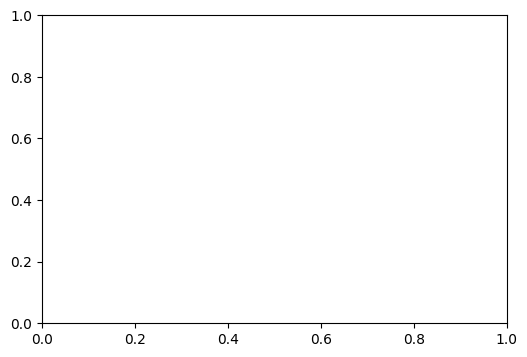

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



# Define markers and labels for each model
# model_markers = {
#     'KNN': 'o',
#     'XGBoost': 's',
#     'CatBoost': 'D',
#     'LightGBM': 'v'
# }

# COLOR_MAP = {
#         'KNN': 'red',
#         'XGBoost': 'green',
#         'CatBoost': 'blue',
#         'LightGBM': 'purple'
#     }
# COLOR_MAP = {
#         'KNN': 'black',
#         'XGBoost': 'black',
#         'CatBoost': 'black',
#         'LightGBM': 'black'
#     }
COLOR_MAP = {
        '4903217': 'green', 
        '4903218': 'purple',
        '4903220': 'blue',
    }

LABEL_MAP = {
        '4903217': 'DS_high', 
        '4903218': 'DS_low1',
        '4903220': 'DS_low4',
}

LINE_MAP = {
        'KNN': '-',
        'XGBoost': ':', 
        'CatBoost': '-.',
        'LightGBM': '--', 
        # 'KNN+XGBoost+CatBoost+LightGBM': '-',
    }

# Plot the F1 scores for each model with decreasing sampling ratios using different markers and labels
fig, ax = plt.subplots(figsize=[6,4])
for float_number in ['4903217', '4903218']: 
    RESULT_DIR = f'../results/{split_type}split/{float_number}'
    output_file = os.path.join(RESULT_DIR, 'random_sampling.csv')
    figure_file = os.path.join(RESULT_DIR, 'random_sampling.png')  # Path to save the figure

    # Read the results from the output file
    results_df = pd.read_csv(output_file)

    # Filter the results to exclude the specified model
    filtered_results = results_df

    # Rank the sampling ratios in ascending order
    ranked_ratios = filtered_results.groupby('Sampling Ratio')['F1-score'].mean().sort_index(ascending=False).index

    # Sort the results by the ranked sampling ratios in descending order
    sorted_results = filtered_results.sort_values(by=['Sampling Ratio'], ascending=True)
    sorted_results['Sampling Ratio'] = pd.Categorical(sorted_results['Sampling Ratio'], categories=ranked_ratios, ordered=True)

    x_values = model_results['Sampling Ratio'].to_numpy()# Creating linearly spaced x-values

    for model_name, model_results in sorted_results.groupby('Model'):

        label = model_name

        # marker = model_markers[model_name]
        # ax.plot(model_results['Sampling Ratio'], model_results['F1 Score'], marker=marker, linewidth=2, label=label, color=COLOR_MAP[model_name])
        ax.semilogx(x_values, model_results['F1-score'], linewidth=1.5, label=f'{LABEL_MAP[float_number]}, {model_name}', color=COLOR_MAP[float_number], linestyle=LINE_MAP[model_name])

# Set plot labels and title
plt.xlabel('Sampling ratio')
plt.ylabel('F1-score')
# plt.title('F1 Scores for Different Models')

# Show the legend
plt.legend()

# Save the figure with a tight bounding box
plt.savefig(figure_file, dpi = 300, bbox_inches='tight')

# Show the plot
print(f"Float: {float_number}")
plt.show()

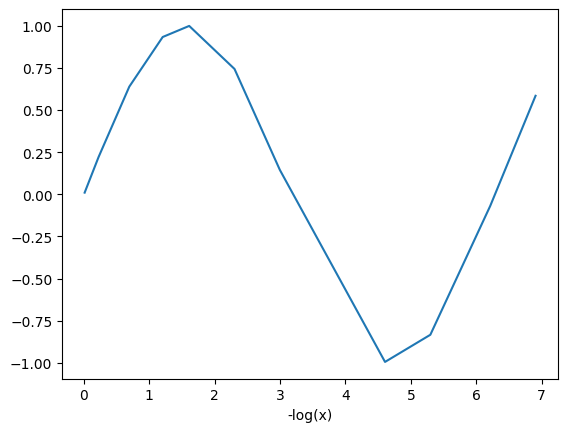

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x_values = model_results['Sampling Ratio'].to_numpy()# Creating linearly spaced x-values

# Apply the transformation -log(x) to the x-values
transformed_x_values = -np.log(x_values)

# Sample function for y-values (replace this with your actual data)
y_values = np.sin(transformed_x_values)

# Create a plot
plt.plot(transformed_x_values, y_values)

# Set x-axis label
plt.xlabel("-log(x)")

# Show the plot
plt.show()


In [ ]:
transformed_x_values

array([-6.90775528, -6.2146081 , -5.29831737, -4.60517019, -2.99573227,
       -2.30258509, -0.69314718, -0.01005034])